In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np 
with open("C:/Users/sammasi/Downloads/MUA_data.pkl", "rb") as f:
    #C:\Users\sammasi\Downloads
    data = pickle.load(f)

## Types of Layers

In [2]:
layerArray = []
for key in data.keys(): # [0,1,2.....115]
    layerArray.append(data[key]['info']['layer'])

layerArray = set(layerArray)
print(layerArray)
    

{b'LSG', b'L4C', b'LIG'}


In [3]:
spike_count_arrays = []

datadf = pd.DataFrame(columns=['Cell Number', 'Stimulus Diameter', 'Spike Count','Layer'])

for i in data.keys():
    spike_count_arrays = np.mean(np.sum(data[i][100.0]['spkR_NoL'][:,:,400:900],axis = 2),axis=0)
    for l in range(len(data[i]['info']['diam'])):
        row = ['cell{}'.format(i),data[i]['info']['diam'][l],spike_count_arrays[l],data[i]['info']['layer']]
        datadf.loc[len(datadf)] = row

datadf.head(10)

,Cell Number,Stimulus Diameter,Spike Count,Layer
0,cell0,0.1,5.904762,b'LSG'
1,cell0,0.2,15.095238,b'LSG'
2,cell0,0.4,14.619048,b'LSG'
3,cell0,0.5,12.952381,b'LSG'
4,cell0,0.6,14.666667,b'LSG'
5,cell0,0.8,12.238095,b'LSG'
6,cell0,1.0,15.047619,b'LSG'
7,cell0,1.2,15.333333,b'LSG'
8,cell0,1.5,15.095238,b'LSG'
9,cell0,1.8,12.285714,b'LSG'


In [4]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2178
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cell Number        2179 non-null   object 
 1   Stimulus Diameter  2179 non-null   float64
 2   Spike Count        2179 non-null   float64
 3   Layer              2179 non-null   object 
dtypes: float64(2), object(2)
memory usage: 85.1+ KB


In [5]:
datadf.describe()

,Stimulus Diameter,Spike Count
count,2179.000000,2179.000000
mean,5.056218,46.822248
std,7.247281,37.731973
min,0.100000,0.803922
25%,0.600000,13.719888
50%,1.800000,36.000000
75%,5.000000,77.245098
max,26.000000,150.190476


In [6]:
import plotly.express as px

fig = px.scatter(datadf,datadf["Stimulus Diameter"], datadf["Spike Count"],color=datadf['Cell Number'])


# Add titles and labels
fig.update_layout(
    title='Stim Diam vs Spike Count for cells',
    xaxis_title='Stimulus Diameter',
    yaxis_title='Spike Count',
    autosize = True,
    )

fig.show()


In [7]:
import plotly.express as px

fig = px.line(datadf,datadf["Stimulus Diameter"], datadf["Spike Count"],color=datadf['Cell Number'])


# Add titles and labels
fig.update_layout(
    title='Stim Diam vs Spike Count for cells with shape (21, 19, 1000)',
    xaxis_title='Stimulus Diameter',
    yaxis_title='Spike Count',
    autosize = True,)
#    yaxis_type="log")

fig.show()


In [8]:
fig = px.scatter(datadf,datadf["Cell Number"], datadf["Spike Count"],color =datadf['Stimulus Diameter'] )
fig.update_layout(autosize=True,)

fig.show()

In [9]:
tempdf = datadf.groupby('Cell Number')
tempdf['Spike Count'].sum()

Cell Number
cell0      222.190476
cell1      154.904762
cell10     357.190476
cell100    120.921569
cell101    163.372549
              ...    
cell95     188.215686
cell96     322.882353
cell97     321.784314
cell98     401.450980
cell99     215.882353
Name: Spike Count, Length: 116, dtype: float64

In [10]:
fig = px.scatter(datadf,x = datadf["Cell Number"], y = datadf["Stimulus Diameter"],color =datadf['Spike Count'] )
fig.update_layout(
    autosize=True,)

fig.show()

<BarContainer object of 3 artists>

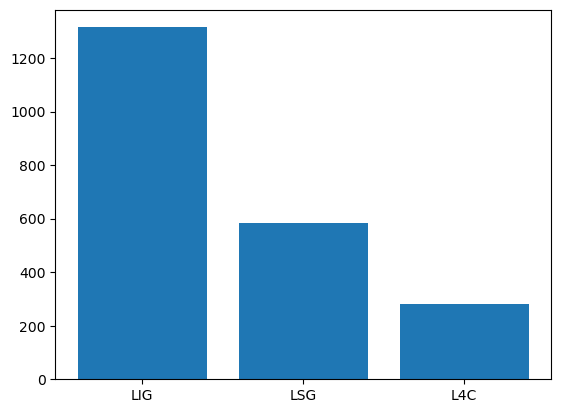

In [11]:
plt.bar(datadf['Layer'].value_counts().index, datadf['Layer'].value_counts().values,)

In [12]:
datadf.head()

,Cell Number,Stimulus Diameter,Spike Count,Layer
0,cell0,0.1,5.904762,b'LSG'
1,cell0,0.2,15.095238,b'LSG'
2,cell0,0.4,14.619048,b'LSG'
3,cell0,0.5,12.952381,b'LSG'
4,cell0,0.6,14.666667,b'LSG'


In [13]:
# group by layer to see the distribution of spikes

tempdf = datadf.groupby(['Layer','Stimulus Diameter'])['Spike Count'].mean().reset_index()
tempdf.head(15)
#56


,Layer,Stimulus Diameter,Spike Count
0,b'L4C',0.1,20.185725
1,b'L4C',0.2,35.307525
2,b'L4C',0.4,50.280205
3,b'L4C',0.5,52.957212
4,b'L4C',0.6,53.702342
5,b'L4C',0.8,50.850333
6,b'L4C',1.0,48.898347
7,b'L4C',1.2,44.989384
8,b'L4C',1.5,41.208358
9,b'L4C',1.8,37.876401


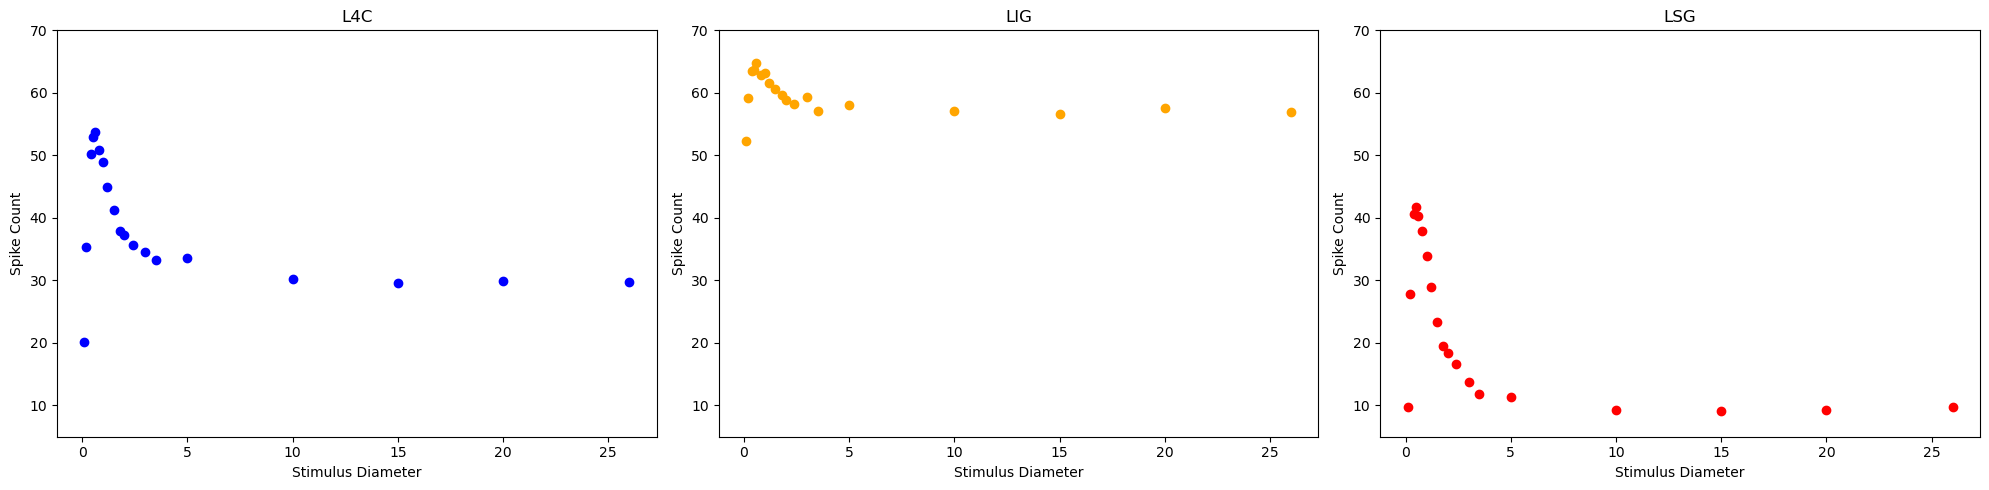

In [14]:

data = np.array([
    [0.1, 20.185725, 52.273199, 9.716266],
    [0.2, 35.307525, 59.178341, 27.848599],
    [0.4, 50.280205, 63.561180, 40.622032],
    [0.5, 52.957212, 63.720362, 41.672167],
    [0.6, 53.702342, 64.769427, 40.295086],
    [0.8, 50.850333, 62.874663, 37.891542],
    [1.0, 48.898347, 63.148327, 33.852931],
    [1.2, 44.989384, 61.537603, 29.003799],
    [1.5, 41.208358, 60.558320, 23.376055],
    [1.8, 37.876401, 59.593843, 19.432572],
    [2.0, 37.280924, 58.915667, 18.432040],
    [2.4, 35.729869, 58.287371, 16.560997],
    [3.0, 34.612002, 59.346241, 13.708133],
    [3.5, 33.293590, 57.126222, 11.912658],
    [5.0, 33.610044, 58.054620, 11.330796],
    [10.0, 30.204738, 57.166446, 9.273297],
    [15.0, 29.568352, 56.623403, 9.100186],
    [20.0, 29.835261, 57.513481, 9.330678],
    [26.0, 29.756551, 56.883185, 9.766210]
])

# define the labels and colors
labels = ['L4C', 'LIG', 'LSG']
colors = ['blue', 'orange', 'red']

# plot the bar charts
fig, axes = plt.subplots(1, 3, figsize=(20, 5))


for i, ax in enumerate(axes):
    ax.scatter(data[:, 0], data[:, i+1], color=colors[i])
    ax.set(ylim=(5,70))
    ax.set_xlabel('Stimulus Diameter')
    ax.set_ylabel('Spike Count')
    ax.set_title(labels[i])

plt.tight_layout()
plt.show()


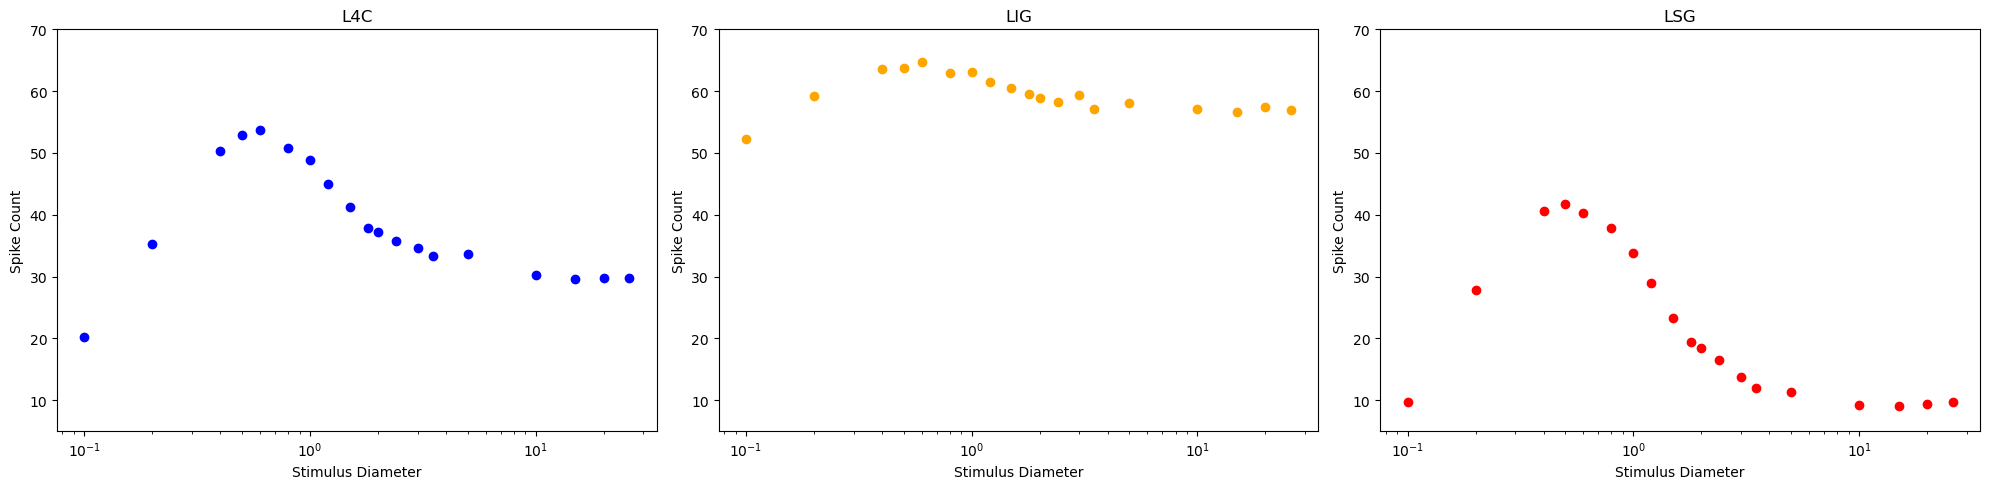

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.scatter(data[:, 0], data[:, i+1], color=colors[i])
    ax.set(ylim=(5,70),xscale='log')
    ax.set_xlabel('Stimulus Diameter')
    ax.set_ylabel('Spike Count')
    ax.set_title(labels[i])

plt.tight_layout()
plt.show()


## Number of Spike' distribution for the All the cells irrespective of the stim condition
### (note : few cells have exposure to 20 stim_diam, most of them 19)

In [16]:
tempdf = (datadf.groupby(["Cell Number"])['Spike Count'].sum()).reset_index()
fig = px.bar(tempdf,x = tempdf["Cell Number"],y = tempdf["Spike Count"])
fig.update_layout(autosize=True )
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

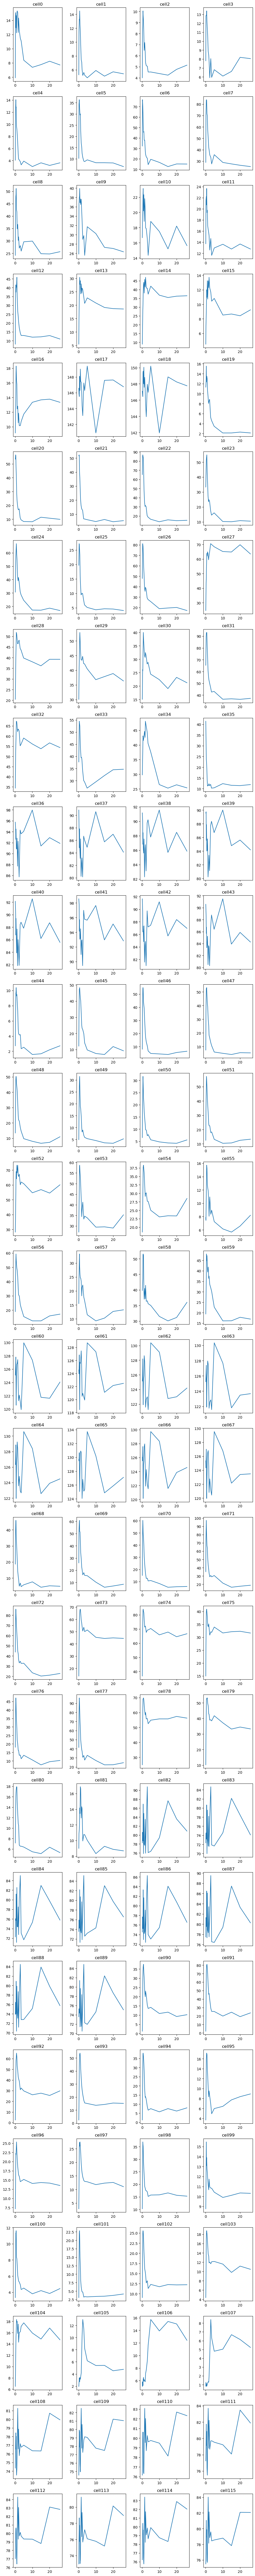

In [17]:
# Create subplots with one plot for each row of the dataframe
fig, axes = plt.subplots(int(len(datadf['Cell Number'].unique())/4), 4, figsize=(10, 100))
axes = axes.ravel()
for i in range(len(datadf['Cell Number'].unique())):
    x = datadf[datadf['Cell Number']==datadf['Cell Number'].unique()[i]]['Stimulus Diameter']
    y = datadf[datadf['Cell Number']==datadf['Cell Number'].unique()[i]]['Spike Count']
    axes[i].plot(x, y)
    axes[i].set_title(datadf['Cell Number'].unique()[i])
# Show the figure
fig.tight_layout()
plt.show